In [1]:
%matplotlib inline
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
import camb as camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.3 installed at /home/jovyan/.local/lib/python3.7/site-packages/camb


In [2]:
import classy as classy
from classy import Class

In [3]:
print('Using CLASS %s installed at %s'%(classy.__version__,os.path.dirname(classy.__file__)))

Using CLASS v2.9.3 installed at /opt/conda/lib/python3.7/site-packages


In [4]:
from ipywidgets.widgets import *

# CAMB

In [5]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [7]:
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


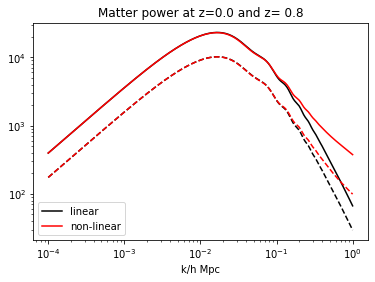

In [8]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

# CLASS

In [9]:
from classy import Class

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'output': 'tCl lCl',
    'l_max_scalars': 2000,
    'lensing': 'yes',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.6711,
    'omega_b': 0.022068,
    'omega_cdm': 0.12029}

# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)

# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
cosmo.compute()

# Access the lensed cl until l=2000
cls = cosmo.lensed_cl(2000)

In [10]:
cls['tp']

array([0.00000000e+00, 0.00000000e+00, 5.21007405e-10, ...,
       1.71932275e-22, 1.71736815e-22, 1.71533384e-22])

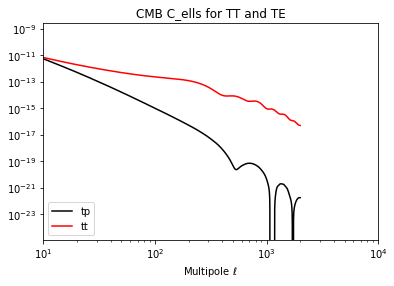

In [21]:
plt.loglog(cls['ell'], cls['tp'], color='k', label="tp")
plt.loglog(cls['ell'], cls['tt'], color='r', label="tt")
plt.xlim(10,10000)
plt.xlabel('Multipole $\ell$');
plt.legend( loc='lower left');

plt.title('CMB C_ells for TT and TE');

In [22]:
# Print on screen to see the output
#print(cls)
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

# plot something with matplotlib...

# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
cosmo.struct_cleanup()

# If you want to change completely the cosmology, you should also
# clean the arguments, otherwise, if you are simply running on a loop
# of different values for the same parameters, this step is not needed
cosmo.empty()

In [23]:
print("Notebook ran successfully")

Notebook ran successfully
